<img src=https://api-manager.universia.net/coreplatform-document-management/api/document-management/public/6ra7ymjkfi64845 width="300" align="left">
<br />

# Aprendizaje automático I
#### <font color=green>*Máster en Informática Industrial y Robótica*</font>

# Tema 4: Comparación de modelos

#### Ejemplo de uso de contrastes de hipótesis para la comparación de múltiples modelos

#### Importación de las librerías:

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import filters
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from src.plotter import show_row_of_gray_images
from src.metrics import multiple_scores

#### Lectura de los datos del Iris:

In [5]:
# generate random integer values
from random import seed
from random import randint
from skimage import exposure
import os
r = 120
c = 180
# seed random number generator
seed(1)

input_class1_path = "./Dataset/Grading_dataset/Class_I"
class1_names = os.listdir(input_class1_path)
input_class2_path = "./Dataset/Grading_dataset/Class_II"
class2_names = os.listdir(input_class2_path)
input_classex_path = "./Dataset/Grading_dataset/Extra_Class"
classex_names = os.listdir(input_classex_path)
n = 200

class1 = np.zeros([n, r, c])
class2 = np.zeros([n, r, c])
extra_class = np.zeros([n, r, c])

t1 = np.zeros(n)
t2 = np.zeros(n)
text = np.zeros(n)
rgb1 = np.zeros([r,c,3])

for i in range(0, n, 1):
    img = resize(imread("./Dataset/Grading_dataset/Class_I/" + class1_names[i])[:,:,1], (r, c))
    class1[i] = img
    t1[i] = 1
    img = resize(imread("./Dataset/Grading_dataset/Class_II/" + class2_names[i])[:,:,1], (r, c))
    class2[i] = img
    t2[i] = 2
    img = resize(imread("./Dataset/Grading_dataset/Extra_Class/" + classex_names[i])[:,:,1], (r, c))
    extra_class[i] = img
    text[i] = 0
    rgb1 = imread("./Dataset/Grading_dataset/Extra_Class/" + classex_names[i])


(429, 675, 3)


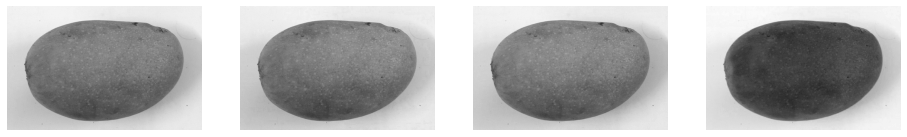

In [21]:

print (rgb1.shape)
red = rgb1[:, :, 0]   #nos quedamos con la matriz del canal rojo (índice 0) 
green = rgb1[:, :, 1] #nos quedamos con la matriz del canal verde (índice 1)
blue = rgb1[:, :, 2]  #nos quedamos con la matriz del canal azul (índice 2)

show_row_of_gray_images(16,rgb2gray(rgb1), red, green, blue)

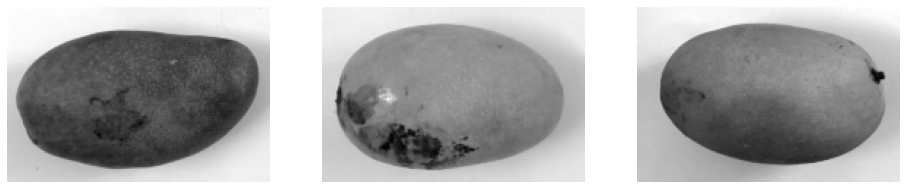

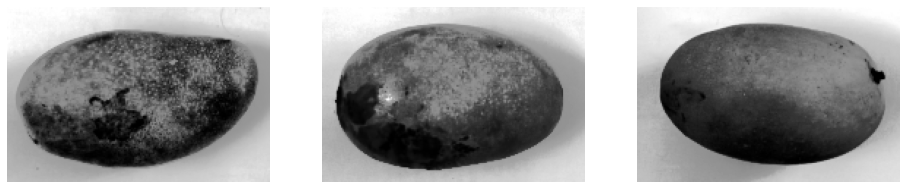

In [22]:
img_1 = class1[randint(0, 200)]
img_2 = class2[randint(0, 200)]
img_ext = extra_class[randint(0, 200)]

show_row_of_gray_images(16, img_1, img_2, img_ext)

show_row_of_gray_images(16,exposure.equalize_hist(img_1, nbins=256, mask=None)
                        ,exposure.equalize_hist(img_2, nbins=256, mask=None),
                        exposure.equalize_hist(img_ext, nbins=256, mask=None))


#### Validación cruzada de los modelos (Logistic Regression, LDA y KNN):

In [23]:
from sklearn import metrics
CV = 20
X = np.zeros([n*3,r*c])
X[0:200] = extra_class.reshape(n,r*c)
X[200:400] = class1.reshape(n,r*c)
X[400:600] = class2.reshape(n,r*c)
t = np.zeros(n*3)
t[0:200] = text
t[200:400] = t1
t[400:600] = t2

scoring = ['recall_macro', 'precision_micro', 'recall_micro', 'f1_macro','accuracy']

modelLR = LogisticRegression(penalty='none', solver = 'lbfgs', max_iter=10000, multi_class='multinomial')
scoresLR = cross_validate(modelLR, X, t, cv=CV, scoring=scoring)
print('Media del LR  : ', np.mean(scoresLR['test_accuracy']))

modelLDA = LinearDiscriminantAnalysis()
scoresLDA = cross_validate(modelLDA, X, t, cv=CV, scoring=scoring)
print('Media del LDA : ', np.mean(scoresLDA['test_accuracy']))

modelKNN = KNeighborsClassifier(round(np.sqrt(n)))
scoresKNN = cross_validate(modelKNN, X, t, cv=CV, scoring=scoring)
print('Media del KNN : ', np.mean(scoresKNN['test_accuracy']))



Media del LR  :  0.6183333333333334
Media del LDA :  0.6716666666666666
Media del KNN :  0.5016666666666666


dict

In [34]:
#Funcion que te tira ya todos los scores de todos los modelos , pendiente de desarrollo!
scores = multiple_scores(X,t,CV,modelKNN,modelLDA)  

El conjunto de entrenamiento contiene 420 datos
El conjunto de test contiene 180 datos


C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Clase real')

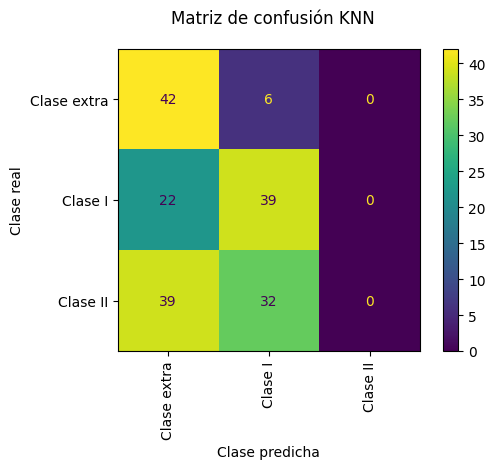

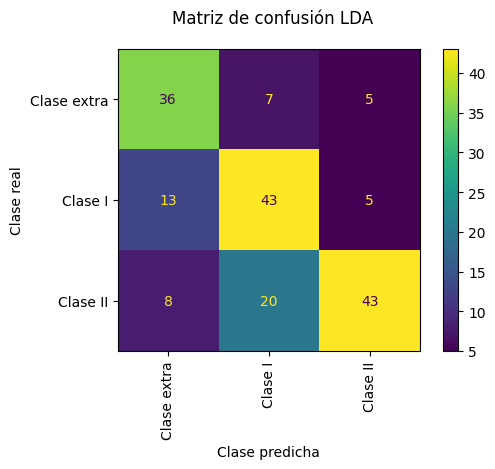

In [9]:
Clases=['Clase extra','Clase I','Clase II']
X_train, X_test, t_train, t_test = train_test_split(X, t, train_size=0.7)  
print("El conjunto de entrenamiento contiene", len(t_train), "datos")
print("El conjunto de test contiene", len(t_test), "datos")

modelKNN.fit(X_train, t_train)
disp = plot_confusion_matrix(modelKNN, X_test, t_test, display_labels = Clases, xticks_rotation = 'vertical') # Muestra gráficamente la matriz de confusión
disp.figure_.suptitle("Matriz de confusión KNN");         # Añade un título a la figura de la matriz de confusión
disp.figure_.set_dpi(100)                             # Establece el tamaño de la figura
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")

modelLR.fit(X_train, t_train)
disp = plot_confusion_matrix(modelLR, X_test, t_test, display_labels = Clases, xticks_rotation = 'vertical') # Muestra gráficamente la matriz de confusión
disp.figure_.suptitle("Matriz de confusión LDA");         # Añade un título a la figura de la matriz de confusión
disp.figure_.set_dpi(100)                             # Establece el tamaño de la figura
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")

#### Se muestra un diagrama de cajas con los resultados de la validación cruzada:

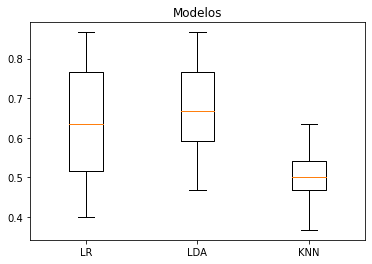

In [10]:
data = [scoresLR['test_accuracy'], scoresLDA['test_accuracy'], scoresKNN['test_accuracy']]
fig7, ax = plt.subplots()
ax.set_title('Modelos')
ax.boxplot(data,labels=['LR', 'LDA', 'KNN']);

#### Contraste de hipótesis:

Primero se muestran los resultados obtenidos aplicando el test de [Kruskall-Wallis](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal) y el test de [Anova](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html). Si se rechaza la hipótesis, entonces se puede afirmar que los modelos son diferentes y, posteriormente, se aplican dos test de comparación múltiple mediante el uso de la clase [MultiComparison](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html). Estos métodos comprueban si hay diferencias significativas con un p<0.05, corrigiendo el hecho de que se están haciendo múltiples comparaciones que normalmente aumentarían la probabilidad de que se identifique una diferencia significativa. Un resultado de "reject = true" significa que se ha observado una diferencia significativa:
- Método de Tukey. Se emplea para ello la función [tukeyhsd](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.tukeyhsd.html#statsmodels.sandbox.stats.multicomp.MultiComparison.tukeyhsd).
- Método de Holm-Bonferroni. Se emplea para ello la función [allpairtest](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.allpairtest.html#statsmodels.sandbox.stats.multicomp.MultiComparison.allpairtest)

In [11]:
alpha = 0.05
F_statistic, pVal = stats.kruskal(scoresLR['test_accuracy'], scoresLDA['test_accuracy'], scoresKNN['test_accuracy'])
F_statistic2, pVal2 = stats.f_oneway(scoresLR['test_accuracy'], scoresLDA['test_accuracy'], scoresKNN['test_accuracy'])
print ('p-valor KrusW:', pVal)
print ('p-valor ANOVA:', pVal2)
if pVal <= alpha:
    print('Rechazamos la hipótesis: los modelos son diferentes\n')
    stacked_data = np.vstack((scoresLR['test_accuracy'],scoresLDA['test_accuracy'],scoresKNN['test_accuracy'])).ravel()
    stacked_model = np.vstack((np.repeat('modelLR',CV),np.repeat('modelLDA',CV),np.repeat('modelKNN',CV))).ravel()    
    MultiComp = MultiComparison(stacked_data, stacked_model)
    comp = MultiComp.allpairtest(stats.ttest_rel, method='Holm')
    print (comp[0])    
    print(MultiComp.tukeyhsd(alpha=0.05))
else:
    print('Aceptamos la hipótesis: los modelos son iguales')

p-valor KrusW: 0.00019048124190368612
p-valor ANOVA: 6.854208823460695e-05
Rechazamos la hipótesis: los modelos son diferentes

Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
 group1   group2    stat   pval  pval_corr reject
-------------------------------------------------
modelKNN modelLDA -9.0831    0.0       0.0   True
modelKNN  modelLR -4.6316 0.0002    0.0004   True
modelLDA  modelLR  2.9367 0.0085    0.0085   True
-------------------------------------------------
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
modelKNN modelLDA     0.17 0.0001 0.0824 0.2576   True
modelKNN  modelLR   0.1167 0.0062  0.029 0.2043   True
modelLDA  modelLR  -0.0533 0.3155 -0.141 0.0343  False
------------------------------------------------------
